In [33]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [34]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
MAX_COUNT = settings.max_count
LATEST_RELEASE = '12.12.450.4196'

TARGETNAME = 'placement'

In [35]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_matches.pickle'))

In [36]:
raw_df

,match_id,placement,augment0,augment1,augment2,Set7_Cavalier,Set7_Dragonmancer,Set7_Jade,Set7_Legend,Set7_Ragewing,...,TFT7_TahmKench_item2,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vladimir_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Aatrox_item2,TFT7_Skarner_item2
0,NA1_4356726048,6,TFT7_Augment_AxiomArc1,TFT6_Augment_SecondWind1,TFT7_Augment_DragonmancerInspire,0.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA1_4356726048,7,TFT6_Augment_SecondWind1,TFT6_Augment_CelestialBlessing1,TFT6_Augment_FuturePeepers,0.0,0.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA1_4356726048,8,TFT6_Augment_TinyTitans,TFT6_Augment_MakeshiftArmor1,TFT6_Augment_Diversify2,0.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA1_4356726048,5,TFT6_Augment_SecondWind1,TFT6_Augment_Weakspot,TFT6_Augment_MakeshiftArmor2,NaN,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA1_4356726048,1,TFT6_Augment_Electrocharge1,TFT6_Augment_Diversify1,TFT7_Augment_GuildEmblem,2.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,NA1_4356236024,8,TFT7_Augment_CannoneerRicochet,TFT6_Augment_SecondWind2,TFT7_Augment_ThinkFast,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6596,NA1_4356236024,5,TFT7_Augment_AssassinEmblem,TFT7_Augment_GadgetExpert,TFT6_Augment_CelestialBlessing3,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6597,NA1_4356236024,4,TFT7_Augment_Bloodlust1,TFT6_Augment_Ascension,TFT7_Augment_UrfsGrabBag2,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TFT_Item_ArchangelsStaff,NaN
6598,NA1_4356236024,1,TFT6_Augment_CyberneticImplants2,TFT6_Augment_PortableForge,TFT6_Augment_ForceOfNature,1.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
raw_df[raw_df['match_id'].duplicated()]

,match_id,placement,augment0,augment1,augment2,Set7_Cavalier,Set7_Dragonmancer,Set7_Jade,Set7_Legend,Set7_Ragewing,...,TFT7_TahmKench_item2,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vladimir_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Aatrox_item2,TFT7_Skarner_item2
1,NA1_4356726048,7,TFT6_Augment_SecondWind1,TFT6_Augment_CelestialBlessing1,TFT6_Augment_FuturePeepers,0.0,0.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA1_4356726048,8,TFT6_Augment_TinyTitans,TFT6_Augment_MakeshiftArmor1,TFT6_Augment_Diversify2,0.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA1_4356726048,5,TFT6_Augment_SecondWind1,TFT6_Augment_Weakspot,TFT6_Augment_MakeshiftArmor2,NaN,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA1_4356726048,1,TFT6_Augment_Electrocharge1,TFT6_Augment_Diversify1,TFT7_Augment_GuildEmblem,2.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NA1_4356726048,3,TFT6_Augment_ThrillOfTheHunt1,TFT6_Augment_SecondWind1,TFT7_Augment_CannoneerHotShot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,NA1_4356236024,8,TFT7_Augment_CannoneerRicochet,TFT6_Augment_SecondWind2,TFT7_Augment_ThinkFast,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6596,NA1_4356236024,5,TFT7_Augment_AssassinEmblem,TFT7_Augment_GadgetExpert,TFT6_Augment_CelestialBlessing3,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6597,NA1_4356236024,4,TFT7_Augment_Bloodlust1,TFT6_Augment_Ascension,TFT7_Augment_UrfsGrabBag2,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TFT_Item_ArchangelsStaff,NaN
6598,NA1_4356236024,1,TFT6_Augment_CyberneticImplants2,TFT6_Augment_PortableForge,TFT6_Augment_ForceOfNature,1.0,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [39]:
# Check NA
check_NA(raw_df)

augment1                     3
augment2                    21
Set7_Cavalier             4292
Set7_Dragonmancer         3013
Set7_Jade                 3560
                          ... 
TFT7_AurelionSol_item0    6584
TFT7_AurelionSol_item1    6585
TFT7_AurelionSol_item2    6585
TFT7_Aatrox_item2         6586
TFT7_Skarner_item2        6596
Length: 264, dtype: int64


In [40]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [41]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [42]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4356726048    8
NA1_4354756696    8
NA1_4355853805    8
NA1_4355214645    8
NA1_4355434858    8
                 ..
NA1_4354071819    8
NA1_4354017245    8
NA1_4354076766    8
NA1_4356036666    8
NA1_4356236024    8
Name: match_id, Length: 825, dtype: int64 

augment0
TFT6_Augment_PortableForge                317
TFT6_Augment_SecondWind2                  206
TFT7_Augment_UrfsGrabBag1                 195
TFT6_Augment_SecondWind1                  177
TFT6_Augment_Weakspot                     162
                                         ... 
TFT6_Augment_FuturePeepers2                 1
TFT7_Augment_GuildLootHR                    1
TFT6_Augment_Diversify2                     1
TFT7_Augment_CavalierDevastatingCharge      1
TFT7_Augment_AstralTrait2                   1
Name: augment0, Length: 186, dtype: int64 

augment1
TFT6_Augment_SecondWind1                  290
TFT6_Augment_Weakspot                     250
TFT6_Augment_T

In [43]:
# raw_df.arrival_day = pd.to_numeric(raw_df.arrival_day, errors='coerce').astype('int64')
# raw_df[TARGETNAME] = raw_df[TARGETNAME].astype(bool)

In [44]:
raw_df.describe()

,placement,Set7_Cavalier,Set7_Dragonmancer,Set7_Jade,Set7_Legend,Set7_Ragewing,Set7_Shapeshifter,Set7_Shimmerscale,Set7_Swiftshot,Set7_Tempest,...,Set7_SpellThief,TFT7_Senna,TFT7_Zoe,TFT7_Nidalee,TFT7_Kayn,TFT7_Skarner,TFT7_Varus,TFT7_Aatrox,TFT7_Lillia,TFT7_AurelionSol
count,6600.000000,2308.000000,3587.000000,3040.000000,3702.000000,4319.000000,2658.000000,2548.000000,3471.000000,3943.000000,...,389.0,74.000000,388.000000,140.000000,310.000000,76.000000,83.000000,72.000000,236.000000,17.000000
mean,4.500000,0.809359,0.870086,0.975329,0.034846,0.700625,0.877728,0.652669,0.577643,0.731676,...,1.0,1.729730,1.438144,2.835714,1.735484,2.105263,2.590361,1.916667,1.830508,1.294118
std,2.291461,0.905150,0.935073,0.842119,0.183414,0.682594,0.630209,0.686287,0.534899,0.604841,...,0.0,0.647382,0.522159,0.442535,0.522347,0.722569,0.644605,0.402457,0.558190,0.469668
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,4.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000
75%,6.250000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000
max,8.000000,4.000000,3.000000,4.000000,1.000000,3.000000,3.000000,4.000000,2.000000,4.000000,...,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


2022-06-29 00:02:04,795 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


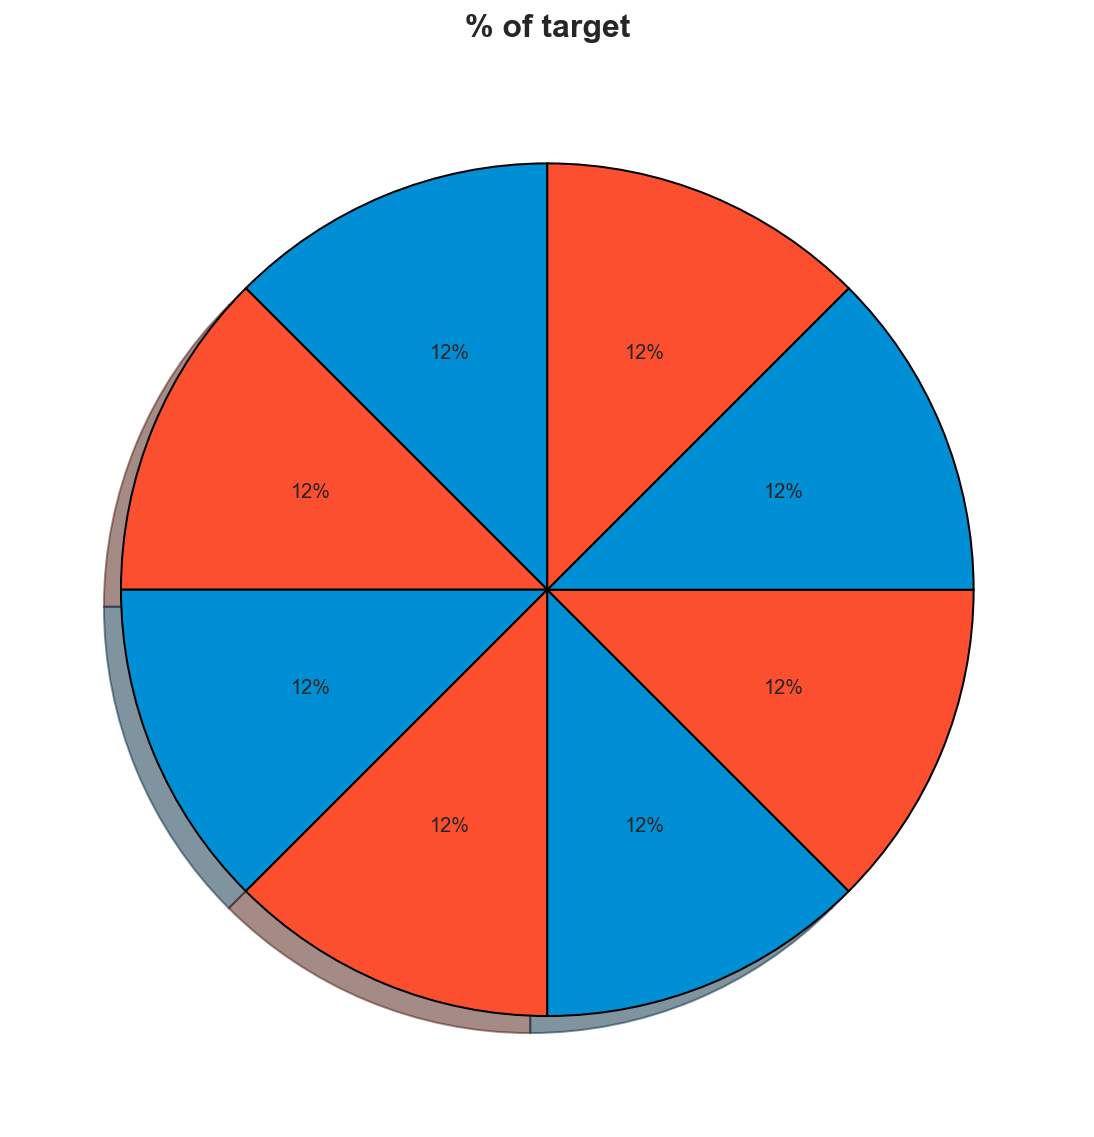

In [45]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
plt.legend(loc='best', fontsize='medium')
plt.show()

In [46]:
X = raw_df.drop(['match_id'], axis=1)

In [47]:
y = X.pop(TARGETNAME)

In [48]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [49]:
y

0       6
1       7
2       8
3       5
4       1
       ..
6595    8
6596    5
6597    4
6598    1
6599    6
Name: placement, Length: 6600, dtype: int64

In [50]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier(objective="multi:softprob", eval_metric="auc",
                    n_estimators=100, use_label_encoder=False)

In [53]:
le_target = LabelEncoder()
le = defaultdict(LabelEncoder)
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
# augments_oe = OrdinalEncoder()
# room_oe = OrdinalEncoder()
preproc = StandardScaler()

# Encode label. 0 = Show , 1 = No Show
y = le_target.fit_transform(y)

In [54]:
# Encode category columns.
logistic_regression_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
        ],
        remainder=preproc,
    ),
    xgb,
)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.80, random_state=42)

logistic_regression_pipeline.fit(X_train, y_train)
y_pred = logistic_regression_pipeline.predict(X_test)

In [56]:


def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le.classes_, columns = le.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()



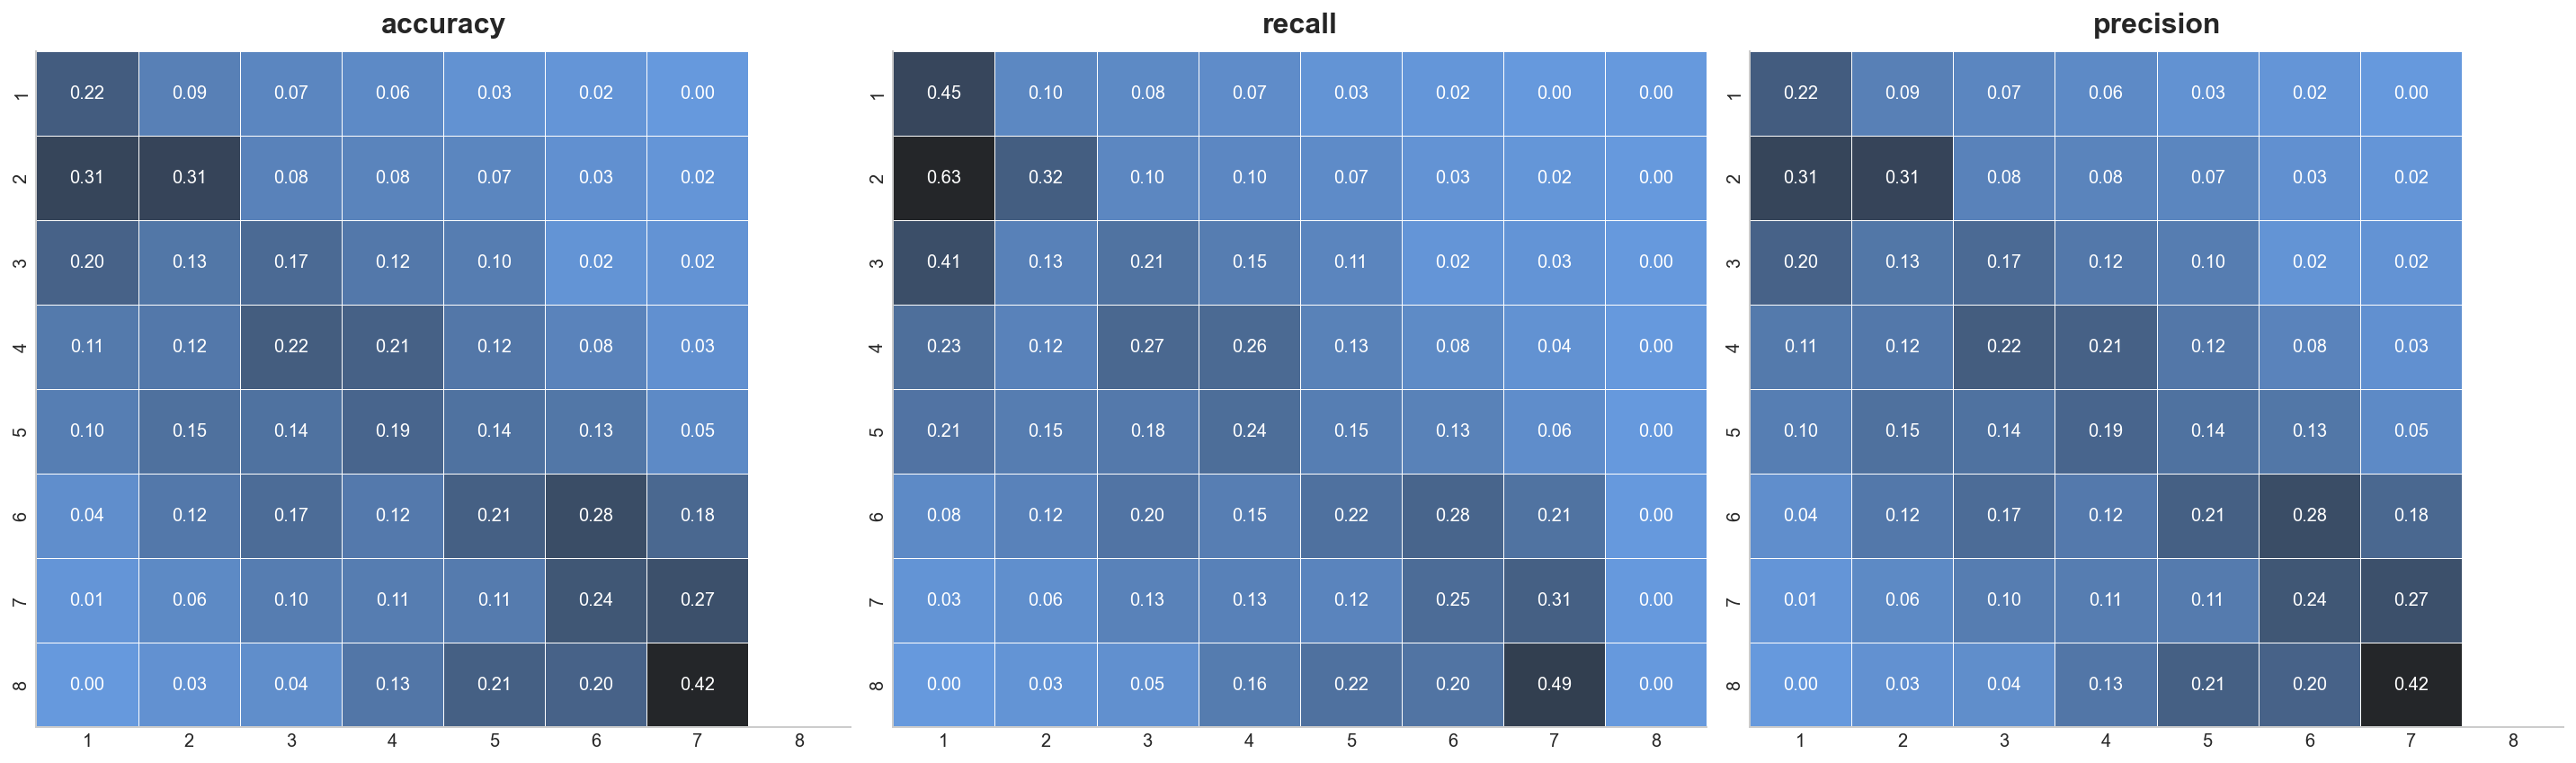

In [58]:
# create confusion matrix, calculate accuracy,recall & precision
cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
plot_cm(cm)

In [59]:
le_target.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)